# Please execute the following python file first!

```python3 ./libml/extract_accuracies.py```

In [1]:
from glob import glob
import numpy as np
import json
import pandas as pd

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [6]:
dataset = 'cifar100'

# Datasets vs accuracy

In [7]:
def summarize_final_results(data=dataset, split='test', n_last=20):
    '''
    Calculate the mean and standard deviation of results of the last 'n_last' epochs.
    '''

    if data == 'cifar10':
        sample_sizes = [100,500,1000,2500,5000,25000,50000]
    elif data == 'cifar100':
        sample_sizes = [1000,2500,5000,25000,50000]
    else:
        assert False, "Please, check datasets"

    models = ['erm','mixup','l2_0.0005_','l2_0.0025_','l2_0.001_']
    split_list = ['tr','val','test']
    df = pd.DataFrame(columns=['data','model','sample','mean','std'])

    for model in models:
        for sample in sample_sizes:
            try:
                exp_name = '{}_{}_{}'.format(data, model, str(sample))
                path_list = sorted(
                            glob(
                                '../experiments/acc_all/{}10*/{}.*@{}-1/*/accuracies.txt'.format(model, data, sample)
                            ))
                tmp = []
                for path in path_list:
                    f = json.load(open(path, "r"))
                    tmp.append(pd.DataFrame(f, index=split_list))

                try: 
                    tmp = pd.concat(tmp, sort=False)
                    tmp_test = tmp.loc['test'].iloc[:,-n_last:]
                except:
                    print('Based on the only one seed', model, sample, len(path_list))
                    tmp_test = tmp.loc['test'].iloc[-n_last:]

                tmp_dict = {'data': data,
                            'model': model,
                            'sample': sample,
                            'mean': tmp_test.mean().mean(),
                            'std': tmp_test.std().mean()}
                df = df.append(tmp_dict, ignore_index=True)
            except:
                print(model, data, sample)
                pass

    return df

In [20]:
def summarize_gradients(data=dataset):
    '''
    Summarize the gradients for each models
    '''
    
    if data == 'cifar10':
        sample_sizes = [100,500,1000,2500,5000,25000,50000]
    elif data == 'cifar100':
        sample_sizes = [1000,2500,5000,25000,50000]
    else:
        assert False, "Please, check datasets"

    models = ['l2_0.0005_','l2_0.0025_','l2_0.001_']
    df = pd.DataFrame(columns=['data','model','sample','seed', 'gradients'])

    for model in models:
        for sample in sample_sizes:
            for seed in [1,2,3,4,5]:
                exp_name = '{}_{}_{}'.format(data, model, str(sample))
                path_list = sorted(
                    glob(
                        '../experiments/acc_all/{}*/{}.{}@{}-1/*/gradients.txt'.format(model, data, seed, sample)
                    )
                )
                tmp = []
                for path in path_list:
                    f = json.load(open(path, "r"))
                    tmp.append(f)
                tmp_dict = {'data': data,
                            'model': model,
                            'sample': sample,
                            'seed': seed,
                            'gradients': tmp}
                df = df.append(tmp_dict, ignore_index=True)
    return df

In [21]:
summarize_gradients(data='cifar100')

,data,model,sample,seed,gradients
0,cifar100,l2_0.0005_,1000,1,[]
1,cifar100,l2_0.0005_,1000,2,[]
2,cifar100,l2_0.0005_,1000,3,[]
3,cifar100,l2_0.0005_,1000,4,[]
4,cifar100,l2_0.0005_,1000,5,[]
5,cifar100,l2_0.0005_,2500,1,[]
6,cifar100,l2_0.0005_,2500,2,[]
7,cifar100,l2_0.0005_,2500,3,[]
8,cifar100,l2_0.0005_,2500,4,[]
9,cifar100,l2_0.0005_,2500,5,[]


In [22]:
def show_summary_plot(data=dataset):
    df_data = summarize_final_results(data=data, n_last=20)
    if data == 'cifar10':
        x_list = [100,500,1000,2500,5000,25000,50000] # np.log([100,500,1000,2500,5000,25000,50000])
    elif data == 'cifar100':
        x_list = [1000,2500,5000,25000,50000] # np.log([1000,2500,5000,25000,50000])
    else:
        assert False, "Please check datasets."
        
    models=['erm','mixup','l2_0.0005_','l2_0.0025_','l2_0.001_']
    names=['ERM','Mixup','l2_0.0005','l2_0.0025','l2_0.001']
    colors=['dodgerblue','yellowgreen','red','purple','blue']
    
    plt.figure(figsize=(8,6))
    plt.xlabel('$\log$(# of samples)', fontsize=15)
    plt.ylabel('Test accuracy (in %)', fontsize=15)
    plt.title('Dataset: {}'.format(data), fontsize=15)
    
    for i in range(len(colors)):
        ymean = df_data['mean'][df_data['model']==models[i]]
        yerr = df_data['std'][df_data['model']==models[i]]
        plt.plot(x_list, ymean, marker='o', color=colors[i], label=names[i], alpha=0.75) 
        plt.fill_between(x_list, ymean-yerr, ymean+yerr, alpha=0.2, edgecolor=colors[i], facecolor=colors[i])
    
    #plt.ylim(86,88)
    plt.legend(loc='lower right', borderaxespad=0., fontsize=12)
    # plt.savefig(outfile, dpi=200, bbox_inches='tight', pad_inches=0)
    plt.show()
    

In [24]:
def show_lipschitz_plot(data=dataset):
    df_data = summarize_lipschitz(data=data)
    if data == 'cifar10':
        x_list = [100,500,1000,2500,5000,25000,50000] # np.log([100,500,1000,2500,5000,25000,50000])
    elif data == 'cifar100':
        x_list = [1000,2500,5000,25000,50000] # np.log([1000,2500,5000,25000,50000])
    else:
        assert False, "Please check datasets."
        
    #models=['erm','mixup','l2_0.0005_','l2_0.0025_','l2_0.001_']
    #names=['ERM','Mixup','l2_0.0005','l2_0.0025','l2_0.001']
    #colors=['dodgerblue','yellowgreen','red','purple','blue']
    models=['l2_0.0005_','l2_0.001_','l2_0.0025_']
    names=['l2_0.0005','l2_0.001','l2_0.0025']
    colors=['dodgerblue','yellowgreen','red']
    
    
    plt.figure(figsize=(8,6))
    plt.xlabel('$\log$(# of samples)', fontsize=15)
    plt.ylabel('Lipschitz', fontsize=15)
    plt.title('Dataset: {}'.format(data), fontsize=15)
    
    for i in range(len(colors)):
        ymean = df_data['mean'][df_data['model']==models[i]]
        yerr = df_data['std'][df_data['model']==models[i]]
        plt.plot(x_list, ymean, marker='o', color=colors[i], label=names[i], alpha=0.75) 
        plt.fill_between(x_list, ymean-yerr, ymean+yerr, alpha=0.2, edgecolor=colors[i], facecolor=colors[i])
    
    #plt.ylim(86,88)
    plt.legend(loc='lower right', borderaxespad=0., fontsize=12)
    # plt.savefig(outfile, dpi=200, bbox_inches='tight', pad_inches=0)
    plt.show()
    

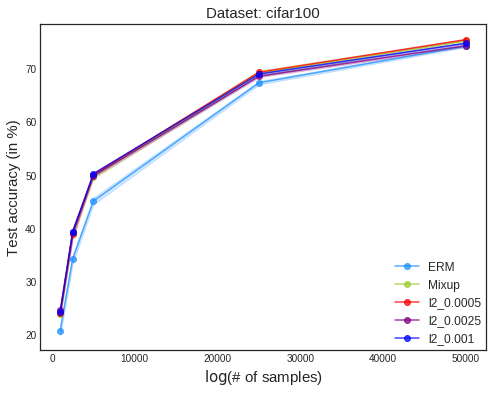

In [26]:
show_summary_plot(data=dataset)

In [54]:
df_data = summarize_final_results(data=dataset, n_last=20)
table_string = str(r'\begin{tabular}{|c|c|c|c|c|c|c|}' + '\n'
                   +r'\hline' + '\n'
                   + r'Dataset & Sample size & ERM & Mixup & l2\_0.0005 & l2\_0.0025 & l2\_0.001\tabularnewline' + '\n'
                   + r'\hline' + '\n'
                   + r'\hline' + '\n'
                   + r'\multirow{5}{*}{Cifar100}'
                   + r'& %d & %.2f & %.2f & %.2f & %d.2f & \tabularnewline' % + '\n'
                   + r'\cline{2-7}' + '\n'
                   + r' & %d &  &  &  &  & \tabularnewline' + '\n'
                   + r'\cline{2-7}' + '\n'
                   + r' & 5000 &  &  &  &  & \tabularnewline' + '\n'
                   + r'\cline{2-7}' + '\n'
                   + r' & 25000 &  &  &  &  & \tabularnewline' + '\n'
                   + r'\cline{2-7}' + '\n'
                   + r' & 50000 &  &  &  &  & \tabularnewline' + '\n'
                   + r'\hline' + '\n'
                   + r'\end{tabular}'
                  )

TypeError: bad operand type for unary +: 'str'

In [57]:
sample = 1000
df_data['sample'] == sample

0      True
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
Name: sample, dtype: bool

In [51]:
print(table_string)

\begin{tabular}{|c|c|c|c|c|c|c|}
\hline
Dataset & Sample size & ERM & Mixup & l2\_0.0005 & l2\_0.0025 & l2\_0.001\tabularnewline
\hline
\hline
\multirow{5}{*}{Cifar100} & 1000 &  &  &  &  & \tabularnewline
\cline{2-7}
 & 2500 &  &  &  &  & \tabularnewline
\cline{2-7}
 & 5000 &  &  &  &  & \tabularnewline
\cline{2-7}
 & 25000 &  &  &  &  & \tabularnewline
\cline{2-7}
 & 50000 &  &  &  &  & \tabularnewline
\hline
\end{tabular}


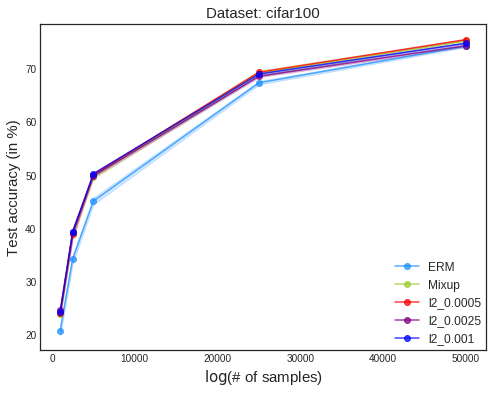

In [7]:
show_summary_plot(data='cifar100')

# Epochs vs generalization gap

In [8]:
def summarize_learning_history(data='cifar10'):
    
    if data == 'cifar10':
        sample_sizes = [100,500,1000,2500,5000,25000,50000]
    elif data == 'cifar100':
        sample_sizes = [1000,2500,5000,25000,50000]
    else:
        assert False, "Please, check datasets"

    models=['erm','mixup','l2_0.0005_','l2_0.0025_','l2_0.001_']
    split_list = ['tr','val','test']
    df = pd.DataFrame(columns=['data','model','sample','mean','std'])

    for model in models:
        for sample in sample_sizes:
            exp_name = '{}_{}_{}'.format(data, model, str(sample))
            path_list = sorted(
                        glob(
                            '../experiments/acc_all/{}10*/{}.*@{}-1/*/accuracies.txt'.format(model, data, sample)
                        ))
            tmp = []
            for path in path_list:
                f = json.load(open(path, "r"))
                tmp.append(pd.DataFrame(f, index=split_list))
            
            tmp = pd.concat(tmp, sort=False)
            generalization_gap = np.array(tmp.loc['tr'])-np.array(tmp.loc['test'])
            
            try:
                tmp_dict = {'data': data,
                            'model': model,
                            'sample': sample,
                           'mean': list(np.mean(generalization_gap, axis=0)),
                           'std': list(np.std(generalization_gap, axis=0))}
            except:
                tmp_dict = {'data': data,
                            'model': model,
                            'sample': sample,
                           'mean': list(generalization_gap),
                           'std': np.zeros(len(list(generalization_gap)))}
                
            
            df = df.append(tmp_dict, ignore_index=True)

    return df


In [9]:
def show_generalization_gap(data='cifar10', sample=50000):
    df_cifar10_history = summarize_learning_history(data=data)
    x_list = np.arange(100)
    
    models=['erm','mixup','l2_0.0005_','l2_0.0025_','l2_0.001_']
    names=['ERM','Mixup','l2_0.0005','l2_0.0025','l2_0.001']
    colors=['dodgerblue','yellowgreen','red','purple','blue']
    
    plt.figure(figsize=(8,6))
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Generalization gap (in %)', fontsize=15)
    plt.title('Dataset-sample size:{}-{}'.format(data,sample), fontsize=15)
    
    for i in range(len(colors)):
        ind = (df_cifar10_history['model']==models[i]) & (df_cifar10_history['sample']==sample)
        ymean = np.array(df_cifar10_history['mean'][ind].iloc[0])
        yerr = np.array(df_cifar10_history['std'][ind].iloc[0])
        plt.plot(x_list, ymean, marker='o', color=colors[i], label=names[i], alpha=0.5) 
        plt.fill_between(x_list, ymean-yerr, ymean+yerr, alpha=0.2, edgecolor=colors[i], facecolor=colors[i])
        
    plt.legend(loc='lower right', borderaxespad=0., fontsize=12)
    #plt.ylim(4,5.5)
    plt.show()

## CIFAR10 dataset

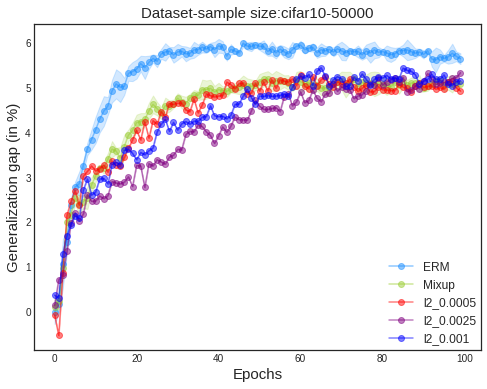

In [15]:
show_generalization_gap(data='cifar10',sample=50000)

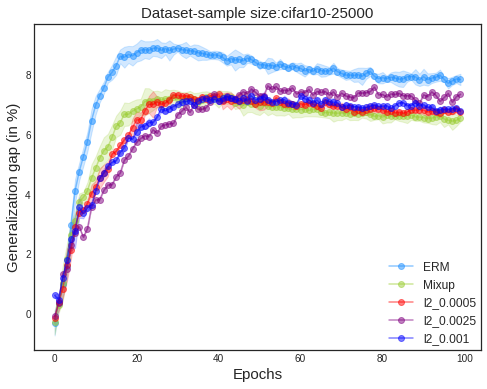

In [16]:
show_generalization_gap(data='cifar10',sample=25000)

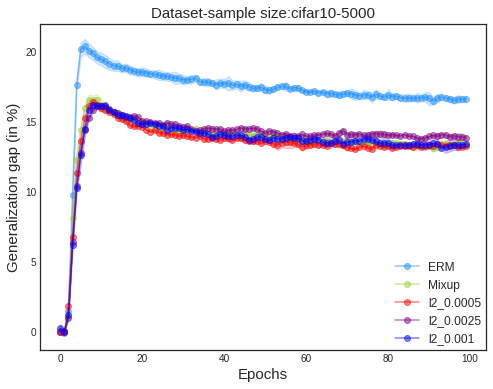

In [17]:
show_generalization_gap(data='cifar10',sample=5000)

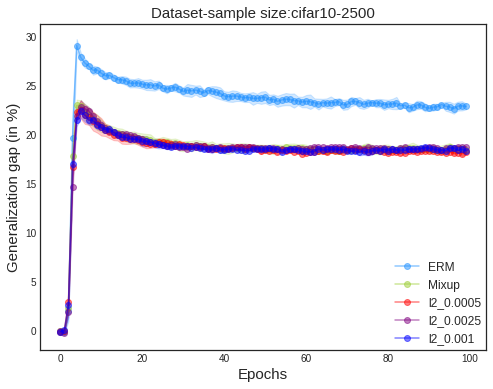

In [18]:
show_generalization_gap(data='cifar10',sample=2500)

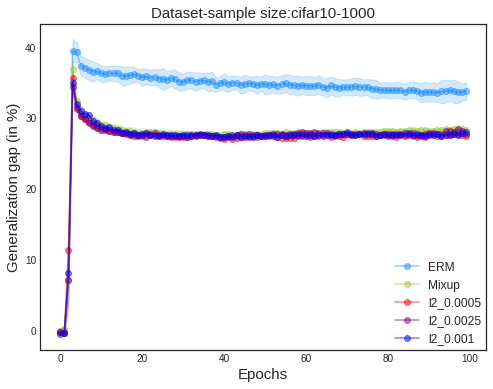

In [19]:
show_generalization_gap(data='cifar10',sample=1000)

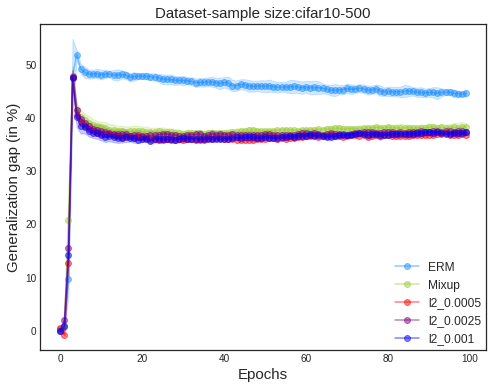

In [20]:
show_generalization_gap(data='cifar10',sample=500)

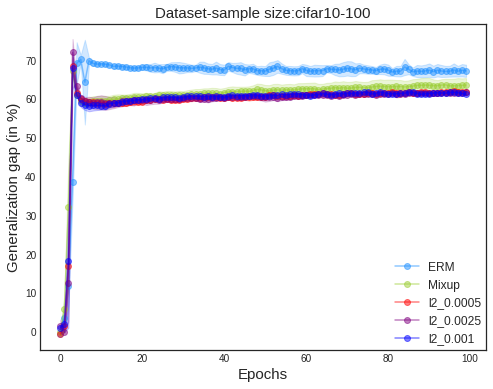

In [21]:
show_generalization_gap(data='cifar10',sample=100)

## CIFAR100 dataset

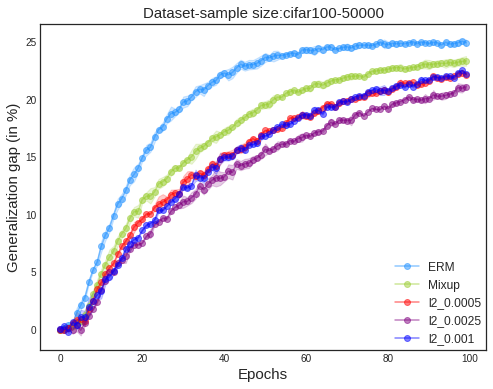

In [11]:
show_generalization_gap(data='cifar100',sample=50000)

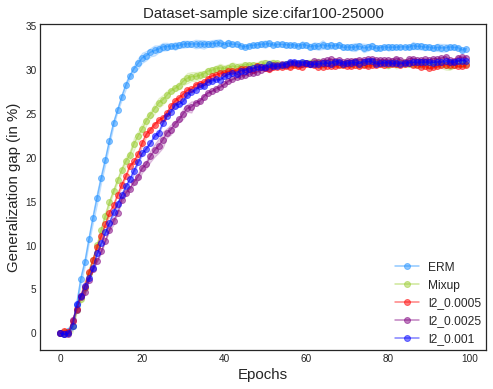

In [12]:
show_generalization_gap(data='cifar100',sample=25000)

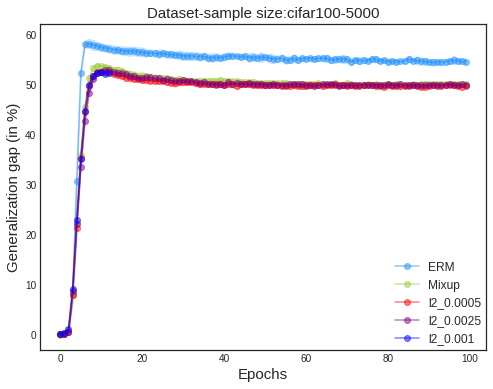

In [13]:
show_generalization_gap(data='cifar100',sample=5000)

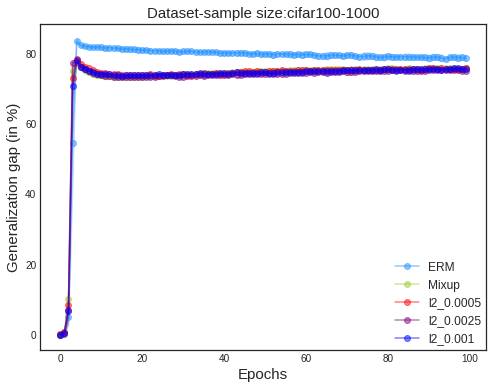

In [14]:
show_generalization_gap(data='cifar100',sample=1000)